In [1]:
!pip install scikit-learn-extra

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
import sklearn

In [5]:
df = pd.read_excel('C:\\Users\\osh27\\Desktop\\강남구.xlsx')
df1 = df.iloc[:, [14,15]]
df1

,x_coord,y_coord
0,127.031022,37.505592
1,127.028737,37.509188
2,127.044566,37.511053
3,127.030032,37.516449
4,127.024211,37.509170
...,...,...
430,127.028743,37.508287
431,127.050310,37.496653
432,127.045730,37.505650
433,127.054733,37.509272


In [6]:
# 최적 클러스터 개수 결정
# 1) 엘보우 기법
def elbow(X) :
    wcss = []
    for i in range(1,11):
        model = KMedoids(n_clusters = i, init = "k-medoids++", random_state = 0)
        model.fit(X)
        wcss.append(model.inertia_)
    plt.figure(figsize=(10,10))
    plt.plot(range(1,11), wcss, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

##  MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1)
scaled

array([[0.13498737, 0.62387516],
       [0.11042691, 0.67394184],
       [0.2805359 , 0.69990293],
       [0.12434518, 0.77502397],
       [0.06179081, 0.67368925],
       [0.41407944, 0.61231437],
       [0.02457053, 0.82407401],
       [0.27021741, 0.71284966],
       [0.45176452, 0.55041323],
       [0.26878948, 0.61200587],
       [0.14762931, 0.52355339],
       [0.45122159, 0.60035391],
       [0.20853515, 0.49876724],
       [0.24373154, 0.81281174],
       [0.22027529, 0.5866651 ],
       [0.19500123, 0.78731016],
       [0.14696447, 0.66158167],
       [0.15978659, 0.52361568],
       [0.32998889, 0.52447193],
       [0.01318057, 0.78663584],
       [0.64657   , 0.41305057],
       [0.69508666, 0.43837031],
       [0.21938157, 0.77488546],
       [0.26826059, 0.78625674],
       [0.1101224 , 0.73668185],
       [0.22087078, 0.46118461],
       [0.18428112, 0.48609568],
       [0.37711847, 0.85096041],
       [0.15845981, 0.79967206],
       [0.26867151, 0.63710195],
       [0.

In [8]:
df = pd.DataFrame(scaled)
df.columns = df1.columns
df.head()

,x_coord,y_coord
0,0.134987,0.623875
1,0.110427,0.673942
2,0.280536,0.699903
3,0.124345,0.775024
4,0.061791,0.673689


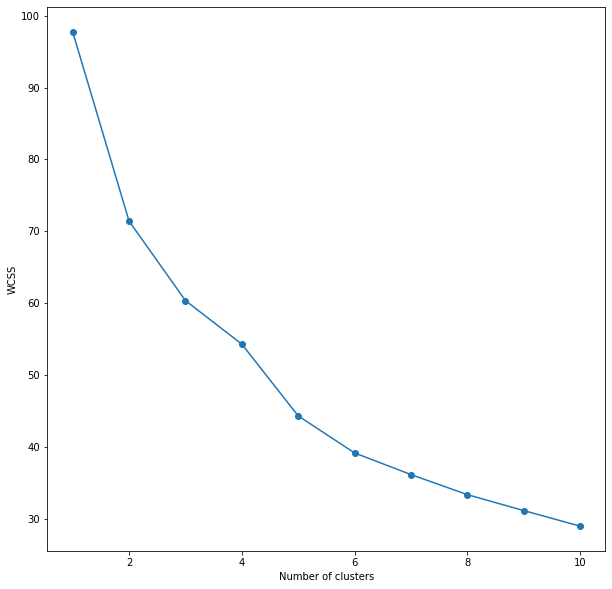

In [9]:
elbow(df)

In [10]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(3,40)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmedoids=KMedoids(n_clusters=k, random_state=200)
    kmedoids.fit(df)
    clusters=kmedoids.predict(df)
    score=silhouette_score(df,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 3 score:  0.3583519477306309
k: 4 score:  0.3697221865991278
k: 5 score:  0.3669912062209163
k: 6 score:  0.3322525384329051
k: 7 score:  0.4037244086931969
k: 8 score:  0.38666484912930615
k: 9 score:  0.3535646098102307
k: 10 score:  0.3638651292273393
k: 11 score:  0.3648559265155317
k: 12 score:  0.36685876698084174
k: 13 score:  0.3369386049729254
k: 14 score:  0.3433735199150652
k: 15 score:  0.31855085614263273
k: 16 score:  0.35984519258591846
k: 17 score:  0.3458464678805297
k: 18 score:  0.33875681487165044
k: 19 score:  0.34838484153678334
k: 20 score:  0.33859202631815166
k: 21 score:  0.33483791803261026
k: 22 score:  0.3521721705959114
k: 23 score:  0.3649273122782274
k: 24 score:  0.3633245140976756
k: 25 score:  0.35577034880872715
k: 26 score:  0.3441863925880951
k: 27 score:  0.33956231326260794
k: 28 score:  0.36048027145799044
k: 29 score:  0.3531331660533079
k: 30 score:  0.33049505287561143
k: 31 score:  0.33227753814901434
k: 32 score:  0.3268351864941128
k: 3

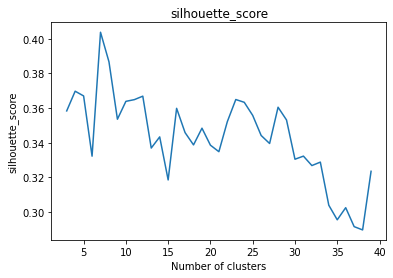

In [11]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [12]:
pca = PCA(2)
data = pca.fit_transform(df)

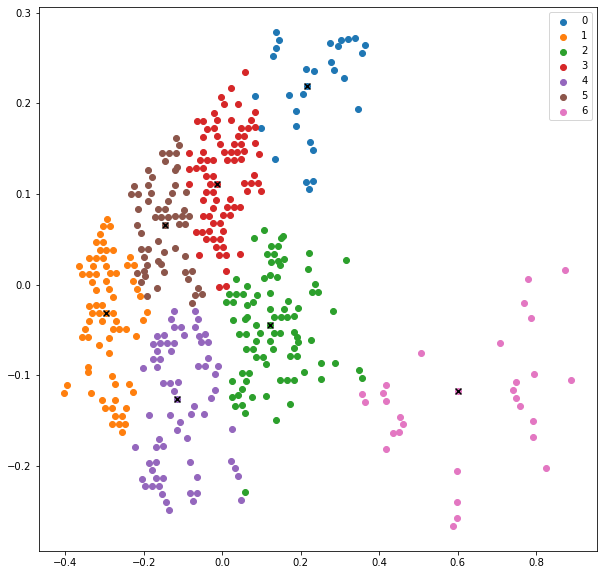

In [13]:
cobj = KMedoids(n_clusters=7).fit(data)
label = cobj.labels_
centers = np.array(cobj.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [14]:
cobj.inertia_


35.882501292556185

In [15]:
cluster = pd.Series(label)
df1['cluster'] = cluster
df1['cluster'].value_counts()

2    90
3    83
1    73
4    70
5    59
6    30
0    30
Name: cluster, dtype: int64

In [16]:
import pandas as pd

df_l = pd.DataFrame(columns = df1.columns[:-1])
df_l

,x_coord,y_coord


In [17]:
c1=[]
c2=[]
c3=[]


for i in range(3):    
    c1.append(df1[df1['cluster']==i]['x_coord'].mean())
    c2.append(df1[df1['cluster']==i]['y_coord'].mean())
   

df_l['x_coord']=c1
df_l['y_coord']=c2



In [18]:
df_l

,x_coord,y_coord
0,127.044722,37.483452
1,127.027090,37.522840
2,127.055459,37.501759


In [19]:
data = pd.read_excel('C:\\Users\\osh27\\Desktop\\군집화 전 진짜 최종 0822.xlsx')

df1['gid'] = data['gid']
df1.head()

,x_coord,y_coord,cluster,gid
0,127.031022,37.505592,5,다사585452
1,127.028737,37.509188,5,다사583456
2,127.044566,37.511053,4,다사597458
3,127.030032,37.516449,5,다사584464
4,127.024211,37.509170,5,다사579456


In [20]:
gid0 = []
gid1 = []
gid2 = []
gid3 = []
gid4 = []
gid5 = []
gid6 = []



data = pd.read_excel('C:\\Users\\osh27\\Desktop\\군집화 전 진짜 최종 0822.xlsx')
for i in range(len(df1)):
    if df1.iloc[i]['cluster']==0:
        gid0.append(df1.iloc[i]['gid'])
    elif df1.iloc[i]['cluster']==1:
        gid1.append(df1.iloc[i]['gid'])
    elif df1.iloc[i]['cluster']==2:
        gid2.append(df1.iloc[i]['gid'])
    elif df1.iloc[i]['cluster']==3:
        gid3.append(df1.iloc[i]['gid'])
    elif df1.iloc[i]['cluster']==4:
        gid4.append(df1.iloc[i]['gid'])
    elif df1.iloc[i]['cluster']==5:
        gid5.append(df1.iloc[i]['gid'])
    else:
        gid6.append(df1.iloc[i]['gid'])

In [21]:
gid0

['다사596426',
 '다사596428',
 '다사599419',
 '다사595427',
 '다사589431',
 '다사603434',
 '다사589436',
 '다사596437',
 '다사596431',
 '다사597422',
 '다사589430',
 '다사600418',
 '다사592437',
 '다사601422',
 '다사603433',
 '다사596429',
 '다사594431',
 '다사605422',
 '다사601431',
 '다사598423',
 '다사588429',
 '다사602417',
 '다사599423',
 '다사602418',
 '다사598421',
 '다사589429',
 '다사598420',
 '다사597432',
 '다사600431',
 '다사602434']

In [22]:
gid2

['다사608451',
 '다사611446',
 '다사611450',
 '다사601444',
 '다사612446',
 '다사613443',
 '다사605458',
 '다사602453',
 '다사604453',
 '다사610453',
 '다사607448',
 '다사607451',
 '다사618441',
 '다사614438',
 '다사599451',
 '다사606452',
 '다사617444',
 '다사614446',
 '다사608445',
 '다사604442',
 '다사623438',
 '다사603443',
 '다사604450',
 '다사606447',
 '다사598453',
 '다사605452',
 '다사616443',
 '다사600453',
 '다사611447',
 '다사608449',
 '다사602446',
 '다사601450',
 '다사608457',
 '다사607438',
 '다사609443',
 '다사613462',
 '다사613448',
 '다사603445',
 '다사598450',
 '다사602449',
 '다사611445',
 '다사611445',
 '다사605451',
 '다사600450',
 '다사611439',
 '다사602441',
 '다사602441',
 '다사602448',
 '다사608439',
 '다사604446',
 '다사600449',
 '다사604444',
 '다사602451',
 '다사602451',
 '다사601443',
 '다사602444',
 '다사622438',
 '다사602443',
 '다사610445',
 '다사599443',
 '다사605450',
 '다사614450',
 '다사608447',
 '다사604457',
 '다사606457',
 '다사610440',
 '다사605455',
 '다사607457',
 '다사607449',
 '다사598445',
 '다사613433',
 '다사606448',
 '다사609444',
 '다사604443',
 '다사608455',
 '다사612449',
 '다사606454',

## StandardScaler

In [23]:
df = pd.read_excel('C:\\Users\\osh27\\Desktop\\군집화 전 진짜 최종 0822.xlsx')
df1 = df.iloc[:, [13,14]]
df1


,x_coord,y_coord
0,127.031022,37.505592
1,127.028737,37.509188
2,127.044566,37.511053
3,127.030032,37.516449
4,127.024211,37.509170
...,...,...
5223,127.083793,37.578799
5224,127.090568,37.582429
5225,127.094958,37.599591
5226,127.076194,37.616095


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
scaled = scaler.fit_transform(df1)

In [25]:
df2 = pd.DataFrame(scaled)
df2.columns = df1.columns
df2.head()

,x_coord,y_coord
0,0.440099,-0.858789
1,0.413136,-0.783827
2,0.599887,-0.744957
3,0.428416,-0.632482
4,0.359742,-0.784205


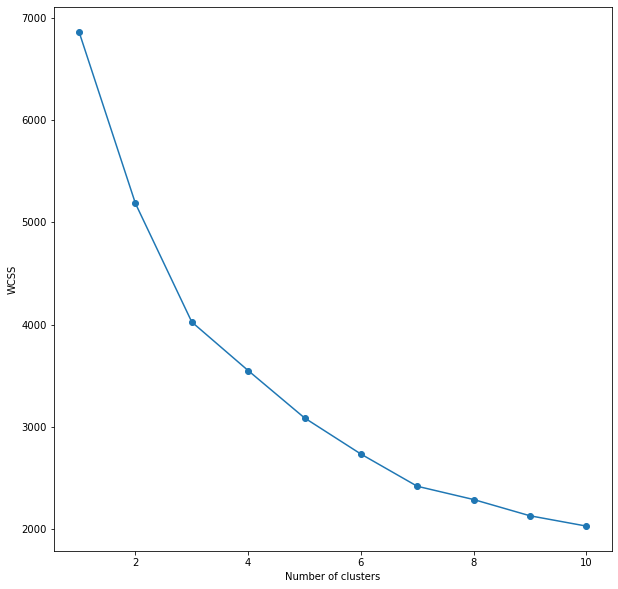

In [26]:
elbow(df2)

In [27]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmedoids=KMedoids(n_clusters=k, random_state=200)
    kmedoids.fit(df2)
    clusters=kmedoids.predict(df2)
    score=silhouette_score(df2,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.3739836608310383
k: 3 score:  0.4222898732719154
k: 4 score:  0.4113971068761022
k: 5 score:  0.3801368449038527
k: 6 score:  0.361138424192588
k: 7 score:  0.37380860892003065
k: 8 score:  0.34906196142967166
k: 9 score:  0.4151133517125212
k: 10 score:  0.39565662576391664
k: 11 score:  0.40111207680558925
k: 12 score:  0.3748232408284987
k: 13 score:  0.3710035744962471
k: 14 score:  0.4046022988109538
best_n: 3 best score: 0.4222898732719154


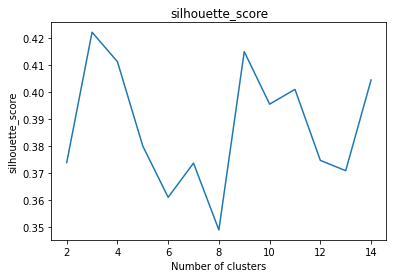

In [28]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [29]:
pca = PCA(2)
data = pca.fit_transform(df2)

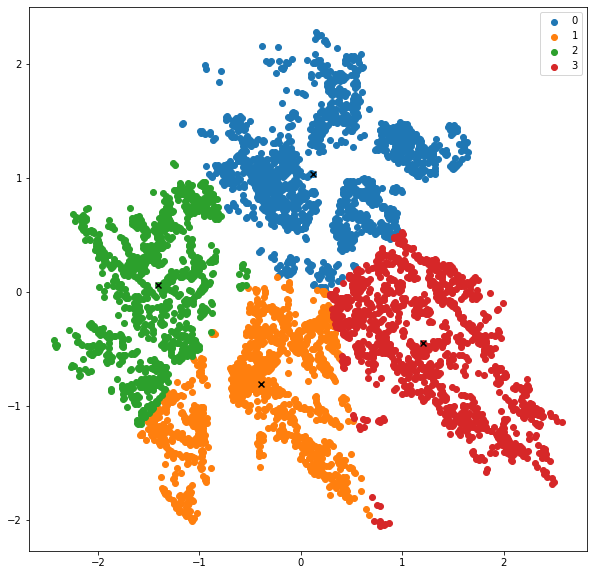

In [30]:
cobj = KMedoids(n_clusters=4).fit(data)
label = cobj.labels_
centers = np.array(cobj.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [31]:
cobj.inertia_

3450.51359018703